In [1]:
%matplotlib widget
import numpy as np
from astropy import units as u, constants as c
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import matplotlib
from astropy.convolution import convolve, Gaussian2DKernel
from scipy.optimize import fsolve, fmin
from astropy.io import fits
import scipy.interpolate as interp

In [107]:
cnfw = 3.3 # NFW concentration parameter
z = 2.3 # redshift
Rs = 29 # kpc = Rvir = 90 kpc
H = cosmo.H(z).to('km/s/kpc').value
# print(H)
# M_h = 1e12*u.M_sun
# rho0 = 3*M_h/(4*np.pi*Rs**3) * 0.5
# A = 8*np.pi*c.G*rho0*Rs**3/(1*u.kpc)
A = 1.2e7 #* u.km**2/u.s**2

bres = 2 # kpc
min_b = 10 # kpc
max_b = 250 # kpc
bvec = np.arange(min_b, max_b, bres)
vrawsamp = np.arange(-1000, 1000, 30)

bvec_final = np.arange(min_b, max_b+2.5, 5)
vvec_final = np.arange(-1000, 1050, 100)

/tmp/ipykernel_3426692/1599214321.py:10: RuntimeWarning: invalid value encountered in sqrt
  vout = np.sqrt(vi**2 + A*(-np.log((Rs+1)/Rs) + (1/r * np.log((Rs+r)/Rs))))


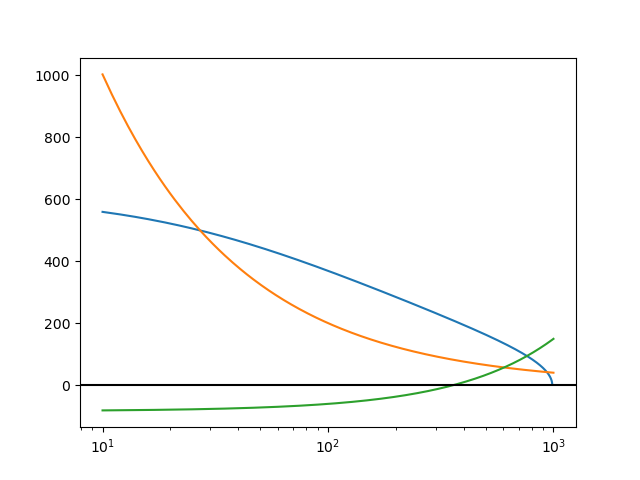

In [108]:
cnfw = 3.3 # NFW concentration parameter
z = 2.3 # redshift
Rs = 29 # kpc = Rvir = 90 kpc
H = cosmo.H(z).to('km/s/kpc').value
def vins(r):
    vin = voff + H*r
    return vin

def vouts(r):
    vout = np.sqrt(vi**2 + A*(-np.log((Rs+1)/Rs) + (1/r * np.log((Rs+r)/Rs))))
    return vout

def vouts_new(r):
    x = r/Rs
    vout_sq = 1/x * (np.log(1+cnfw*x) - (cnfw*x)/(1+cnfw*x))/(np.log(1+cnfw) - cnfw/(1+cnfw))
    vout = 600 * np.sqrt(vout_sq)
    vout = v1*(r/100)**(gv)
    return vout

vi, voff = 603, -84
v1, gv = 200, -0.7


rrange = np.linspace(10,1000, 1000)
plt.figure()
plt.semilogx(rrange, vouts(rrange))
plt.semilogx(rrange, vouts_new(rrange))
plt.semilogx(rrange, vins(rrange))
# plt.semilogx(rrange, vins(rrange) + np.nan_to_num(vouts(rrange)))
plt.axhline(0, c='k')
plt.show()

b = 10
lrange = np.linspace(-2000, 2000, 4000)
r = np.sqrt(b**2 + lrange**2)



0.009999875002343703


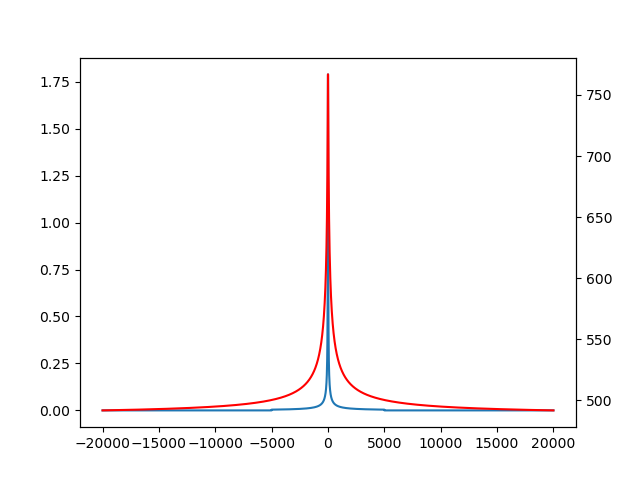

In [109]:
z = 2.3 # redshift
Rs = 29 # kpc = Rvir = 90 kpc
H = cosmo.H(z).to('km/s/kpc').value
def vins(r):
    vin = voff + H*r
    return vin

def vouts(r):
    vout = np.sqrt(vi**2 + A*(-np.log((Rs+1)/Rs) + (1/r * np.log((Rs+r)/Rs))))
    return vout

def ains(r):
    ain = (a0in * (r/100)**(-gin))
    return ain

def aouts(r):
    if r > 5000:
        aout=0
    else:
        aout = (a0out * (r/100)**(-gout))
    return aout

vi, voff = 803, -84
a0in, a0out = 0.1, 0.2
gin, gout = 1, 1

b = 10
lrange = np.linspace(-20000, 20000, 4000)
rr = np.sqrt(b**2 + lrange**2)

tau_outs = [aouts(np.sqrt(b**2 + li**2)) for li in lrange]
print(aouts(np.sqrt(b**2 + 2000**2)))

fig, ax = plt.subplots()
ax.plot(lrange, tau_outs)
ax2 = ax.twinx()
ax2.plot(lrange, vouts(rr), c='r')
plt.show()


In [135]:
def heatmap(vi, gv, voff, a0out, a0in, gout, gin):
    
    def vins(r):
        vin = voff + H*r
        return vin

    # def vouts(r):
    #     vout = np.sqrt(vi**2 + A*(-np.log((Rs+1)/Rs) + (1/r * np.log((Rs+r)/Rs))))
    #     return vout

    def vouts(r):
        vout = vi*(r/10)**(gv)
        return vout

    def vouts_max(r):
        vout = vi*(r/10)**(gv) - 50
        return vout

    # print(vouts_max(1000))

    # print(fsolve(vouts_root, 100))
    # rmaxrange_out = np.logspace(0,6,2000)
    # rmax_out = rmaxrange_out[np.nanargmin(vouts(rmaxrange_out))] #300 kpc
    
    rmax_out = fsolve(vouts_max, 100)[0]
    print(rmax_out)
    rmax_out = 10000
    print(rmax_out)

    # rmaxrange_in = np.logspace(0,6,2000)
    # rmax_in = rmaxrange_in[np.nanargmin(np.abs(vins(rmaxrange_in)))]
    # rmax_in = 1200*u.kpc #rmaxrange_in[np.nanargmax(vels(rmaxrange_in*u.kpc)[1])] * u.kpc #300 kpc
    rmax_in = fsolve(vins, 100)[0] #xtol = 1
    print(rmax_in)

    def ains(r):
        ain = (a0in * (r/100)**(-gin))
        return ain

    def aouts(r):
        if r > rmax_out:
            aout=0
        else:
            aout = (a0out * (r/100)**(-gout))
        return aout


    taulist_out = []
    taulist_in = []


    for bi, b in enumerate(bvec):
        # if b >= rmax_out-20:
        #     print(f'{b} going here')
        #     for vv in range(-vi,vi):
        #         taulist_out.append([b,vv, 0])
        #     continue
        
    
        lmax_out = np.sqrt(rmax_out**2 - b**2)
        lmax_in = np.sqrt(rmax_in**2 - b**2)
    
        larr_slowl_out = np.linspace(-lmax_out, -10, 100)
        nfast_out = int(1500 * np.exp(-b/10)) #1500
        larr_fast_out = np.linspace(-100, 100, nfast_out)
        larr_slowr_out = np.linspace(100, lmax_out, 100)
        larr_out = np.concatenate([larr_slowl_out, larr_fast_out, larr_slowr_out])
    
        tau_outs = [aouts(np.sqrt(b**2 + li**2)) for li in larr_out]


        larr_slowl_in = np.linspace(-lmax_in, -50, 10)
        nfast_in = int(100 * np.exp(-b/100)) #1500
        larr_fast_in = np.linspace(-50, 50, nfast_in)
        larr_slowr_in = np.linspace(50, lmax_in, 10)
        larr_in = np.concatenate([larr_slowl_in, larr_fast_in, larr_slowr_in])
        tau_ins = [ains(np.sqrt(b**2 + li**2)) for li in larr_in]
        # print(tau_ins)

    
        r_out = np.sqrt(larr_out**2 + b**2)
        r_in = np.sqrt(larr_in**2 + b**2)
        # vout, vin = vels(r*u.kpc)

        vLOS_out = larr_out/r_out*vouts(r_out)
        vLOS_in = larr_in/r_in*vins(r_in)
        # plt.figure()
        # sc = plt.scatter(larr_out, vLOS_out, c=tau_outs)
        # sc1 = plt.scatter(larr_in, vLOS_in, c=tau_ins, cmap='inferno')
        # plt.xlabel('$\\ell$ (kpc)')
        # plt.ylabel('$v_\\mathrm{LOS}$ (km/s)')
        # plt.colorbar(sc, label = '$\\tau_\\mathrm{out}$')
        # plt.colorbar(sc1, label = '$\\tau_\\mathrm{in}$')
        # plt.title(f'$b={b}$ kpc')
        # plt.axhline(0, c = 'k', alpha = 0.7, lw = 0.7, ls = '--')
        # plt.axvline(0, c = 'k', alpha = 0.7, lw = 0.7, ls = '--')
        # plt.tight_layout()
        # plt.show()
    
        
        
        l_minvout = larr_out[np.argmin(vLOS_out)]
        l_maxvout = larr_out[np.argmax(vLOS_out)]
        maxvout = np.nanmax(vLOS_out)
        if ~np.isfinite(maxvout):
            # print(f'bad {b}')
            for j in vrawsamp:
                taulist_out.append([b, j, 0])
        else:
            # outflow
            for i in range(int(np.floor(-maxvout)), int(np.ceil(maxvout)), 30): # 10 km/s
            
                possible_values = larr_out[(vLOS_out > i) & (vLOS_out < i+30)]
                l_near = possible_values[(possible_values > l_minvout) & (possible_values < l_maxvout)]
                l_far = possible_values[(possible_values < l_minvout) | (possible_values > l_maxvout)]
        
                tau_near_inds = [np.argwhere(larr_out == ln)[0][0] for ln in l_near]
                tau_out_near = np.array(tau_outs)[tau_near_inds]
        
                
                tau_far_inds = [np.argwhere(larr_out == ln)[0][0] for ln in l_far]
                tau_out_far = np.array(tau_outs)[tau_far_inds]
                tau_tot = np.nanmean(tau_out_near) + np.nanmean(tau_out_far) 

                # print(np.nanmean(tau_out_far)/np.nanmean(tau_out_near))
                
                if np.isfinite(tau_tot):
                    taulist_out.append([b, i+15, tau_tot])
    
        #inflow
    
        l_minvin = larr_in[np.argmin(vLOS_in)]
        l_maxvin = larr_in[np.argmax(vLOS_in)]
        maxvin = np.nanmax(vLOS_in)
        # print(l_minvin, l_maxvin, maxvin)
        
        for i in range(int(np.floor(-maxvin)), int(np.ceil(maxvin)), 30):
        
            possible_values = larr_in[(vLOS_in > i) & (vLOS_in < i+30)]
            # print(possible_values)
            l_near = possible_values[(possible_values < l_minvin) & (possible_values > l_maxvin)]
            l_far = possible_values[(possible_values > l_minvin) | (possible_values < l_maxvin)]
    
            tau_near_inds = [np.argwhere(larr_in == ln)[0][0] for ln in l_near]
            tau_in_near = np.array(tau_ins)[tau_near_inds]
    
            
            tau_far_inds = [np.argwhere(larr_in == ln)[0][0] for ln in l_far]
            tau_in_far = np.array(tau_ins)[tau_far_inds]
            tau_tot = np.nanmean(tau_in_near) + np.nanmean(tau_in_far) 
            # print(tau_tot)

            if np.isfinite(tau_tot):
                taulist_in.append([b, i+15, tau_tot])

    
    tauarr_out = np.array(taulist_out)
    tauarr_in = np.array(taulist_in)

    
    rawhmap = np.zeros((len(vrawsamp), len(bvec)))

    for bi, b in enumerate(bvec):
        bcut_out = (tauarr_out[:,0] == b)
        bcut_in = (tauarr_in[:,0] == b)
        if len(tauarr_out[bcut_out]) == 0:
            tout = vrawsamp*0.0
        else:
            tout = np.interp(vrawsamp, tauarr_out[:,1][bcut_out], tauarr_out[:,2][bcut_out], left=0, right=0)

        if len(tauarr_in[bcut_in]) == 0:
            tin = vrawsamp*0.0
        else:
            tin = np.interp(vrawsamp, tauarr_in[:,1][bcut_in], tauarr_in[:,2][bcut_in], left=0, right=0)

        rawhmap[:,bi] = tout + tin
    
    
    # print(tauarr_out[np.isfinite(tauarr_out[:,2])])
    # plt.figure()
    # plt.scatter(tauarr_out[:,1], tauarr_out[:,2])
    # plt.plot(vrawsamp, tout)
    # plt.plot(vrawsamp, tin)
    # plt.show()
    
    plt.figure()
    sc = plt.scatter(tauarr_out[:,0], tauarr_out[:,1], c=tauarr_out[:,2]) #/cmap='inferno_r' vmin=2e-2, vmax = 1e-1 norm=matplotlib.colors.LogNorm()
    plt.colorbar(sc, label = '$\\tau_\\mathrm{out}$')
    
    # tin = plt.scatter(tauarr_in[:,0], tauarr_in[:,1], c=tauarr_in[:,2], cmap='plasma_r') #/cmap='inferno_r' vmin=2e-2, vmax = 1e-1 norm=matplotlib.colors.LogNorm()
    # plt.colorbar(tin, label = '$\\tau_\\mathrm{in}$')
    plt.xlabel('b (kpc)')
    plt.ylabel('$v_\\mathrm{LOS}$ (km/s)')
    plt.tight_layout()
    plt.show()
    
    # make map
    
    # vres = 10 #50
    # vlosr = np.arange(-1000, 1000, vres)
    
    # hmap = np.zeros((len(vlosr), len(bvec)))
    
    # for bi, b in enumerate(bvec):
    #     bcut_out = (tauarr_out[:,0] == b)
    #     bcut_in = (tauarr_in[:,0] == b)
    
    #     for vind, v in enumerate(vlosr):
    #         vcut_out = (tauarr_out[:,1] > v) & (tauarr_out[:,1] < v+vres)
    #         vcut_in = (tauarr_in[:,1] > v) & (tauarr_in[:,1] < v+vres)
            
    #         tauavg_out = np.nanmean(tauarr_out[:,2][bcut_out & vcut_out])
    #         if ~np.isfinite(tauavg_out):
    #             tauavg_out = 0
    
    #         tauavg_in = np.nanmean(tauarr_in[:,2][bcut_in & vcut_in])
    #         if ~np.isfinite(tauavg_in):
    #             tauavg_in = 0

    #         hmap[vind,bi] = tauavg_out + tauavg_in

    hmap_conv = convolve(rawhmap, Gaussian2DKernel(2,1), boundary = 'extend') # 100 km/s and 5 kpc sampling

    f = interp.RectBivariateSpline(vrawsamp, bvec, hmap_conv, kx=3, ky=3)
    hmap_reshaped = f(vvec_final, bvec_final)
    
    # print(new_im.shape)
    
    # plt.figure()
    # plt.imshow(hmap_reshaped, aspect='auto', origin='lower', extent = [bvec_final.min(), bvec_final.max(), vvec_final.min(), vvec_final.max()])
    # plt.show()
    
    # # print(hmap.shape)
    plt.figure()
    us = plt.imshow(rawhmap, origin='lower', extent = (bvec[0], bvec[-1], vrawsamp[0], vrawsamp[-1]), 
               aspect='auto', cmap='plasma')
    plt.colorbar(us, label = '$\\tau_\\mathrm{tot}$')
    plt.xlabel('b (kpc)')
    plt.ylabel('$v_\\mathrm{LOS}$ (km/s)')
    plt.title('Unsmoothed')
    # plt.xscale('log')
    plt.show()
    
    # plt.figure()
    # sm = plt.imshow(convolve(rawhmap, Gaussian2DKernel(2,4), boundary = 'extend'), origin='lower', extent = (bvec[0], bvec[-1], vrawsamp[0], vrawsamp[-1]), 
    #            aspect='auto', cmap='inferno')
    # plt.colorbar(sm, label = '$\\tau_\\mathrm{tot}$')
    # plt.xlabel('b (kpc)')
    # plt.ylabel('$v_\\mathrm{LOS}$ (km/s)')
    # plt.title('Smoothed')
    # # plt.xscale('log')
    # plt.show()

    return hmap_reshaped
    


In [136]:
lya_real = fits.open('lya_conv_240618.fits')[0].data
# binterp_vec = np.arange(10,252.5,5)
# vinterp_vec = np.arange(-1000, 1050, 100)

5766503906249.993
10000
857.7059628116469


/tmp/ipykernel_3426692/3207507963.py:123: RuntimeWarning: Mean of empty slice
  tau_tot = np.nanmean(tau_out_near) + np.nanmean(tau_out_far)
/tmp/ipykernel_3426692/3207507963.py:150: RuntimeWarning: Mean of empty slice
  tau_tot = np.nanmean(tau_in_near) + np.nanmean(tau_in_far)


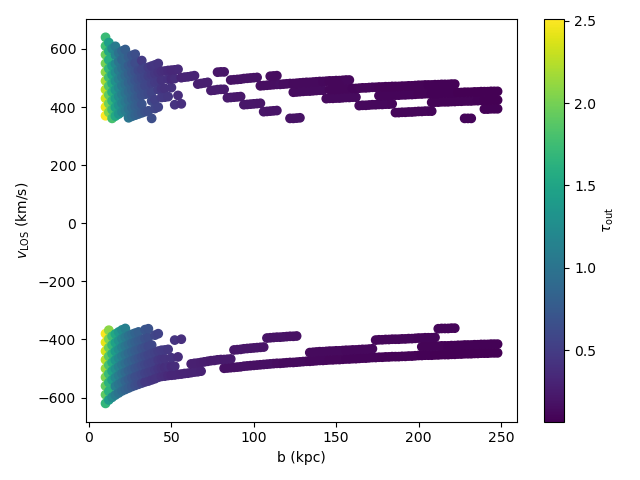

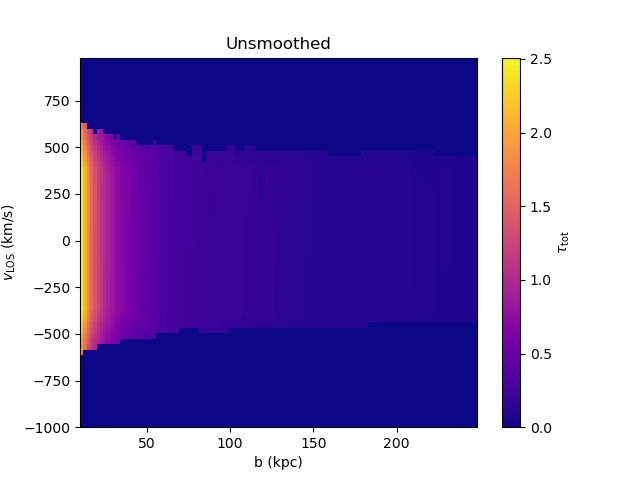

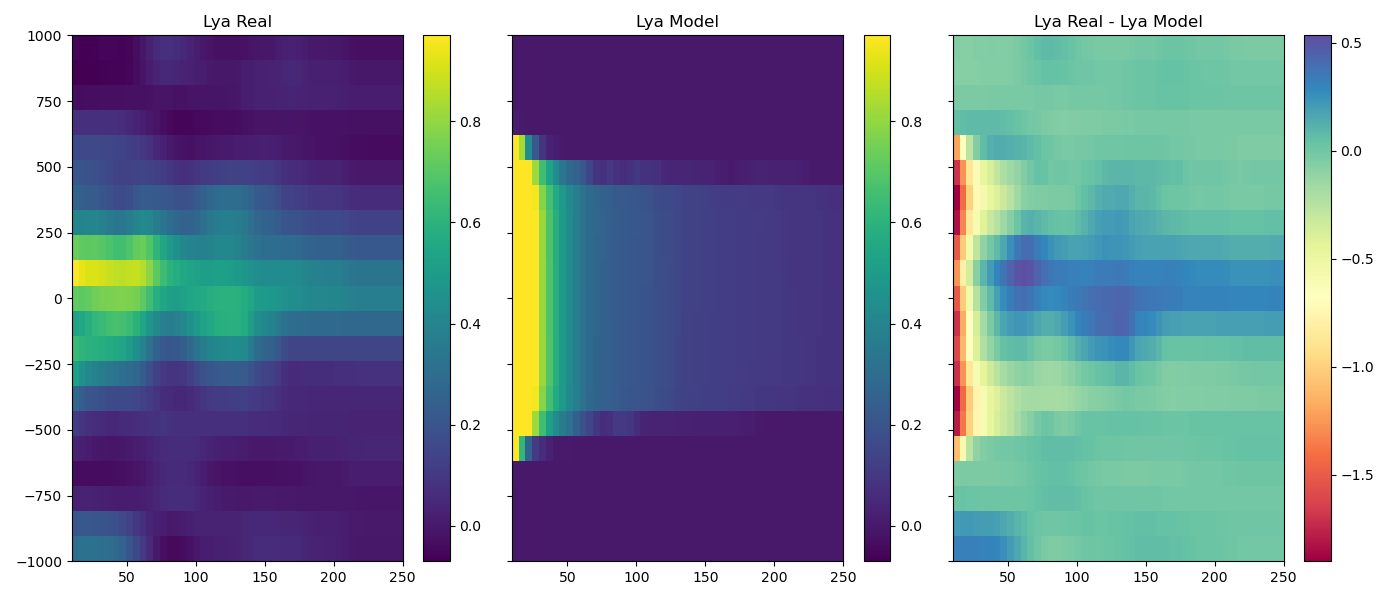

In [140]:
lya_model = heatmap(750, -0.1, -200, 0.29, 0.0, 1, 2) #vout, vin, aout, ain, gout, gin

vmi, vma = -0.07, 0.97

fig, ax = plt.subplots(1,3, figsize = (14,6), sharex=True, sharey=True)
re = ax[0].imshow(lya_real, aspect='auto', origin='lower', 
                  extent = [bvec_final.min(), bvec_final.max(), vvec_final.min(), vvec_final.max()], vmin = vmi, vmax = vma)
fig.colorbar(re, ax=ax[0])
ax[0].set_title('Lya Real')

mod = ax[1].imshow(lya_model, aspect='auto', origin='lower', 
                   extent = [bvec_final.min(), bvec_final.max(), vvec_final.min(), vvec_final.max()], vmin = vmi, vmax = vma)
fig.colorbar(mod, ax=ax[1])
ax[1].set_title('Lya Model')

diff = ax[2].imshow(lya_real - lya_model, aspect='auto', origin='lower',
                    extent = [bvec_final.min(), bvec_final.max(), vvec_final.min(), vvec_final.max()], cmap='Spectral')
fig.colorbar(diff, ax=ax[2])
ax[2].set_title('Lya Real - Lya Model')
fig.tight_layout()
plt.show()